# Ensemble Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
def plot_decision_map(x, model, ax, **kwargs):
    x1min, x2min = x.min(axis=0)
    x1max, x2max = x.max(axis=0)
    X1map, X2map = np.mgrid[x1min:x1max:0.05, x2min:x2max:0.05]
    ypreds = model.predict(np.c_[X1map.reshape(-1, 1), X2map.reshape(-1, 1)])
    ypreds = ypreds.reshape(X1map.shape)
    ax.contourf(X1map, X2map, ypreds, **kwargs)
    ax.set_xlim(x1min, x1max)
    ax.set_ylim(x2min, x2max)

## Voting Classifiers
Train various classifiers, then vote on the prediction:
* **Hard Voting**: Take the mode of the predicted classes 
* **Soft Voting**: Take the class with the highest probability, averaged over every classifier.

We train every classifier under the same training set.

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(500, noise=0.3, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
# Hard Voting Classifier: For a given training instance, take the
# mode of all predicted classes.

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", log_clf),
        ("rf", rnd_clf),
        ("svc", svm_clf)
    ],
    voting="hard"
)

voting_clf.fit(xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [5]:
print("..Hard Voting Classifier Results..")
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    clf_name = clf.__class__.__name__
    print(f"{clf_name:>22}: {accuracy_score(ytest, ypred):0.3%}")

..Hard Voting Classifier Results..
    LogisticRegression: 86.400%
RandomForestClassifier: 87.200%
                   SVC: 88.800%
      VotingClassifier: 89.600%


/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Note:** In this example, that the `VotingClassifier` surpassed all other classifiers is mereley probabilisitic. Modifying how the data is split, or the how the data is generated yield to a lower `VotingClassifier` accuracy

In [6]:
# Soft Voting Classifier: Predict the class with the highest probability,
# averaged over all individual classifiers

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", log_clf),
        ("rf", rnd_clf),
        ("svc", svm_clf)
    ],
    voting="soft"
)

voting_clf.fit(xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [7]:
print("..Soft Classifier Results..")
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    clf_name = clf.__class__.__name__
    print(f"{clf_name:>22}: {accuracy_score(ytest, ypred):0.3%}")

..Soft Classifier Results..
    LogisticRegression: 86.400%
RandomForestClassifier: 87.200%
                   SVC: 88.800%
      VotingClassifier: 91.200%


/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging and Pasting

> Use the same training algorithm for every predictor, but train them on different subsets of the training set

* When sampling with replacement: **bagging**
* When sampling without replacement: **Pasting**

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), # The model to fit
    n_estimators=500, # The number of trees to work with
    max_samples=100, # Number of training instances for each tree
    bootstrap=True, # Set bagging to True; else pasting
    n_jobs=-1 # Number of CPUs to train the model
)

bag_clf.fit(xtrain, ytrain)
ypred = bag_clf.predict(xtest)
accuracy_score(ytest, ypred)

0.92

### Comparing Classifiers: Decision Tree with Bagging v.s. a Single Decision Tree

In [9]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(xtrain, ytrain)
print(f"Number of nodes: {tree_clf.tree_.node_count}")

Number of nodes: 89


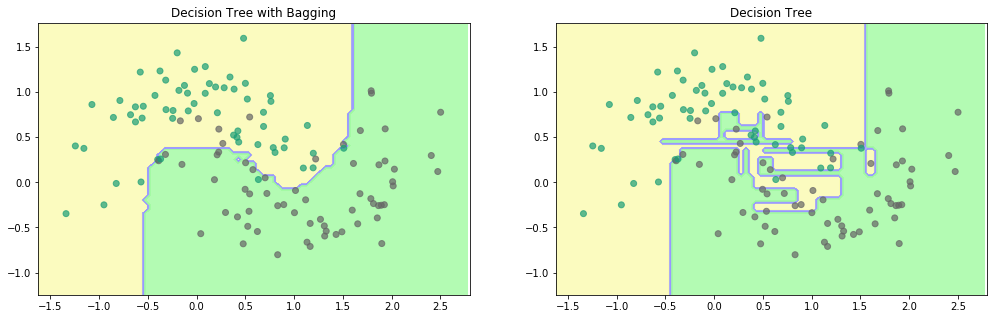

In [10]:
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_decision_map(xtrain, bag_clf, ax1, alpha=0.8, cmap=custom_cmap1)
plot_decision_map(xtrain, tree_clf, ax2, alpha=0.8, cmap=custom_cmap1)
ax1.set_title("Decision Tree with Bagging")
ax2.set_title("Decision Tree")
for ax in (ax1, ax2):
    ax.scatter(*xtest.T, c=ytest, cmap=plt.cm.Dark2, alpha=0.7)

## Out-of-Bag (OOB) Evaluation

When bootstraping, around 63% of the data gets evaluated, the remaining 37% result as unobserved variables. In scikit-learn we can make use of the 37% to evaluate as a cross-validation set in what is called an OOB evaluation.

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=314), # the model to perform bootstrap
    n_estimators=500,                         # number of trees to consider
    bootstrap=True,                           # resample with replacement 
    n_jobs=-1,                                # use all available CPUs
    oob_score=True,                           # Out of Bag evaluation score
    random_state=314
)

bag_clf.fit(xtrain, ytrain)
bag_clf.oob_score_

0.8986666666666666

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(bag_clf.predict(xtest), ytest)

0.904

## Random Forests
**An ensemble of decision trees** generally trained via the *bagging* method and `max_samples` set to the training dataset. For each tree in the forest, instead of searching for the best feature when splitting a node, it searches for the best split among a random subset of the features.

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
forest_clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Feature Importance (On decision trees and random forests)
> It is possible to get an estimate of a feature's imporance by computing the average depth at which it appears across all trees in the forest. 

In [14]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
forest_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
forest_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], forest_clf.feature_importances_):
    print(f"{name:>17}: {score:>9.4%}")

sepal length (cm):   9.3023%
 sepal width (cm):   2.1901%
petal length (cm):  45.6283%
 petal width (cm):  42.8793%


In [15]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

forest_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

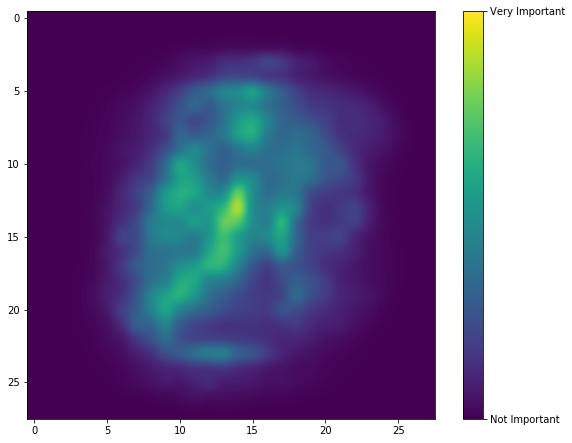

In [16]:
min_importance = forest_clf.feature_importances_.min()
max_importance = forest_clf.feature_importances_.max()

forest_feats = forest_clf.feature_importances_.reshape(28, 28)
plt.figure(figsize=(10,7.5))
plt.imshow(forest_feats, interpolation="gaussian")
cbar = plt.colorbar(ticks=[min_importance, max_importance])
cbar.ax.set_yticklabels(["Not Important", "Very Important"]);

## AdaBoost
* Combine several weak learners into a strong learner.
* Train predictors sequentially, each one trying to correct its predecesor

How to correct a predecesor? Pay a bit more attention to the training instances that the predecessor underfitted: **AdaBoost**

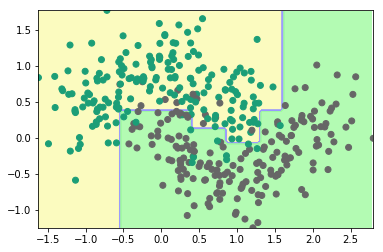

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME",
    learning_rate=0.5
)


ada_clf.fit(xtrain, ytrain)

# Plotting Decision Function
fig = plt.figure()
ax = fig.add_subplot(111)
plot_decision_map(xtrain, ada_clf, ax, cmap=custom_cmap1, alpha=0.8)
plt.scatter(*xtrain.T, c=ytrain, cmap=plt.cm.Dark2)

### Learning with AdaBoost
We consider three classifiers $\{\hat y_1, \hat y_2, \hat y_3\}$ and the target output $y$

For each instance $y^{(i)}$ in the training set, we asign an initial weight $w^{(i)}$, which will be updated as we add models to the ensemble.

After training a model $\hat y_j$ over $\{y^{(i)}\}_{i=1}^n$, compute the **weighted error rate of the $j$-th predictor**:
$$
    r_j = \sum_{\{i \ | \ y_j^{(i)} \neq y^{(i)} \}} w^{(i)}
$$

We proceed by computing the **predictor weight** of the $j$-th classifier as
$$
    \alpha_j = \eta \log \frac{1 - r_j}{r_j}
$$

Note that, as $r_j$ increases (more errors), $\alpha_j$ decreases

Once computed $\alpha_j$, we update each $\{w^{(i)}\}_{i=1}^m$

$$
w^{(i)} = \begin{cases}
   w^{(i)} & y_j^{(i)} = y^{(i)} \\
   w^{(i)} e^{\alpha_j} & y_j^{(i)} \neq y^{(i)}
\end{cases}
$$


In [208]:
import pandas as pd


y = np.array([1, 1, 0, 1, 0, 1, 0, 0, 1])
y1 = np.array([1, 1, 0, 0, 1, 0, 1, 1, 0])
y2 = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0])
y3 = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1])
dset = pd.DataFrame({  "y":  y, "hy1":y1,
                     "hy2": y2, "hy3":y3})

dset = dset[["y", "hy1", "hy2", "hy3"]]
weights = {"i0": np.array([1/9] * len(y))}

In [209]:
dset

,y,hy1,hy2,hy3
0,1,1,0,0
1,1,1,0,0
2,0,0,1,1
3,1,0,1,0
4,0,1,0,1
5,1,0,1,0
6,0,1,1,0
7,0,1,1,0
8,1,0,0,1


In [210]:
r1 = weights["i0"][dset["y"] != dset["hy1"]].sum()
alpha1 = np.log((1 - r1) / r1)

weights["i1"] = weights["i0"]
weights["i1"][np.where(dset["y"] != dset["hy1"])] *= np.exp(alpha1)
weights["i1"] /= weights["i1"].sum()

In [211]:
alpha1

-0.6931471805599456

In [212]:
## Computing the prediction considering the first model
weights["i1"]

array([0.16666667, 0.16666667, 0.16666667, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333])

In [213]:
## Updating weights: considering the second model
r2 = weights["i1"][dset["y"] != dset["hy2"]].sum()
alpha2 = np.log((1 - r2) / r2)

weights["i2"] = weights["i1"]
weights["i2"][np.where(dset["y"] != dset["hy2"])] *= np.exp(alpha2)
weights["i2"] /= weights["i2"].sum()

In [214]:
# Computing predictions considering the first and second model 
weights["i2"]

array([0.11111111, 0.11111111, 0.11111111, 0.16666667, 0.16666667,
       0.16666667, 0.05555556, 0.05555556, 0.05555556])

In [215]:
alpha1, alpha2

(-0.6931471805599456, -1.0986122886681087)

In [216]:
## Updating weights: considering the third model
r3 = weights["i2"][dset["y"] != dset["hy3"]].sum()
alpha3 = np.log((1 - r3) / r3)

weights["i3"] = weights["i2"]
weights["i3"][np.where(dset["y"] != dset["hy2"])] *= np.exp(alpha3)
weights["i3"] /= weights["i3"].sum()

In [219]:
alpha1, alpha2, alpha3

(-0.6931471805599456, -1.0986122886681087, -1.6094379124340992)

In [205]:
# Computing predictions considering the first, second and third
weights["i3"]

array([0.03703704, 0.03703704, 0.03703704, 0.27777778, 0.27777778,
       0.27777778, 0.01851852, 0.01851852, 0.01851852])

In [220]:
alpha1 + alpha2 < alpha3

True

In [221]:
alpha2 + alpha3 < alpha1

True

In [222]:
alpha1 + alpha3 < alpha2

True